In [1]:
# import the libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all image 
IMAGE_SIZE=[224, 224]
train_path='Datasets/train'
valid_path='Datasets/test'

In [4]:
# import the resnet50 as shown below and add preprocessing layer to the front of resnet
# here i  use imagenet weigths
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 27s 0us/step


In [5]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [6]:
 for layer in resnet.layers:
    layer.trainable = False
    

In [7]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

In [9]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [11]:

x = Flatten()(resnet.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [13]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [17]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 18s 10s/step - loss: 5.3340 - accuracy: 0.3594 - val_loss: 10.2212 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 14s 11s/step - loss: 10.1109 - accuracy: 0.3906 - val_loss: 3.1616 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 14s 10s/step - loss: 3.7403 - accuracy: 0.3750 - val_loss: 7.6717 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 16s 11s/step - loss: 6.4657 - accuracy: 0.3438 - val_loss: 7.2172 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 15s 11s/step - loss: 3.7355 - accuracy: 0.3906 - val_loss: 4.3713 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 16s 11s/step - loss: 2.8995 - accuracy: 0.4062 - val_loss: 2.3506 - val_accuracy: 0.5345
Epoch 7/50
2/2 [==============================] - 14s 10s/step - loss: 3.0422 - accuracy: 0.4375 - val_loss: 2.4229 - val_accuracy: 0.5172
Epoch 8/50
2/2 [=========

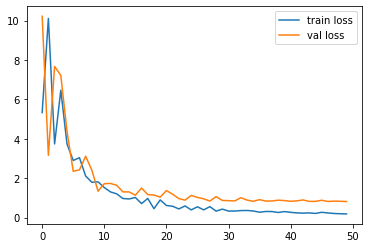

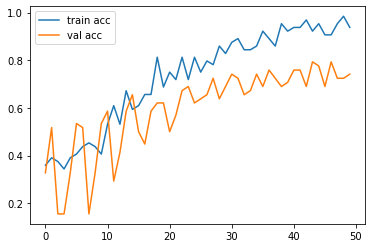

<Figure size 432x288 with 0 Axes>

In [20]:
 #plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [21]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

C:\Users\HP\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [22]:
y_pred = model.predict(test_set)

In [23]:
y_pred

array([[6.92491531e-01, 1.42806709e-01, 1.64701849e-01],
       [5.20230196e-02, 2.46647730e-01, 7.01329231e-01],
       [1.48960287e-02, 4.52926233e-02, 9.39811409e-01],
       [1.00920014e-02, 9.43144262e-01, 4.67638001e-02],
       [4.31405939e-03, 9.86924767e-01, 8.76123458e-03],
       [1.59219783e-02, 9.59914684e-01, 2.41633523e-02],
       [8.95985782e-01, 5.87335080e-02, 4.52806167e-02],
       [1.61879659e-01, 6.61501527e-01, 1.76618814e-01],
       [5.03011756e-02, 4.93311835e-03, 9.44765747e-01],
       [7.84183294e-02, 7.72230744e-01, 1.49350971e-01],
       [1.19965345e-01, 4.39517975e-01, 4.40516710e-01],
       [3.52556556e-02, 7.95999169e-01, 1.68745160e-01],
       [9.47258156e-03, 4.86165941e-01, 5.04361451e-01],
       [4.83664423e-02, 3.13305436e-03, 9.48500514e-01],
       [3.40562090e-02, 5.98312080e-01, 3.67631674e-01],
       [3.42774729e-05, 5.14046173e-04, 9.99451697e-01],
       [3.19647968e-01, 6.54201955e-02, 6.14931881e-01],
       [1.89627881e-05, 1.67371

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([0, 2, 2, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 0, 0, 0, 1, 2, 1, 2, 2], dtype=int64)

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
model=load_model('model_resnet50.h5')

In [29]:
y_pred

array([0, 2, 2, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 0, 0, 0, 1, 2, 1, 2, 2], dtype=int64)

In [43]:
img=image.load_img('Datasets/Test/lamborghini/10.jpg',target_size=(224,224))

In [44]:
x=image.img_to_array(img)
x

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [45]:
x.shape

(224, 224, 3)

In [46]:
x=x/255

In [47]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [48]:
model.predict(img_data)

array([[0.02861326, 0.05169773, 0.91968894]], dtype=float32)

In [49]:
a=np.argmax(model.predict(img_data), axis=1)

In [50]:
a==1

array([False])